In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
cm = np.array([[160, 40],
               [ 30, 70]])

TP, FN, FP, TN = cm.ravel()
tpr, fnr, fpr, tnr = (cm / cm.sum(1, keepdims=True)).ravel()
ppv, npv = cm.diagonal() / cm.sum(0)

prec = ppv
recall = tpr

sens = tpr
spec = tnr

$$
\begin{matrix}
\text{TP} & \text{FN} \\
\text{FP} & \text{TN} \\
\end{matrix} \\[20pt]

\text{OR} = \dfrac{\text{Happened}}{\lnot \ \text{Happened}} \\[20pt]

\begin{matrix}
\text{LR}+ & \text{LR}- \\[10pt]
\dfrac{\text{TPR}}{\text{FPR}} & \dfrac{\text{FNR}}{\text{TNR}}
\end{matrix} \\[20pt]

\text{DOR} \\[10pt]
\dfrac{\text{TPR}}{\text{FPR}} / \dfrac{\text{FNR}}{\text{TNR}}

$$

In [3]:
df = pd.read_csv("Table3+CM.csv", index_col=0)
df

,author,n,sensitivity,specificity,ppv,npv,tp,fn,fp,tn
0,Abdrabo,118,0.920,0.240,0.350,0.870,35,3,60,20
1,Agnihotri,875,0.990,0.050,0.590,0.800,502,5,349,19
2,Aragona,3171,0.920,0.150,0.380,0.760,1059,92,1717,303
3,Chang,225,0.890,0.090,0.190,0.760,43,5,161,16
4,Chavan,440,0.960,0.030,0.180,0.790,77,3,349,11
5,Galic,88,0.910,0.320,0.470,0.850,32,3,36,17
6,Hofer,188,0.920,0.290,0.460,0.850,69,6,80,33
7,Meigs,1524,0.610,0.740,0.340,0.890,168,107,324,925
8,Rashid,206,0.720,0.460,0.280,0.850,34,13,85,74
9,Richie,1167,0.820,0.480,0.310,0.900,212,46,472,437


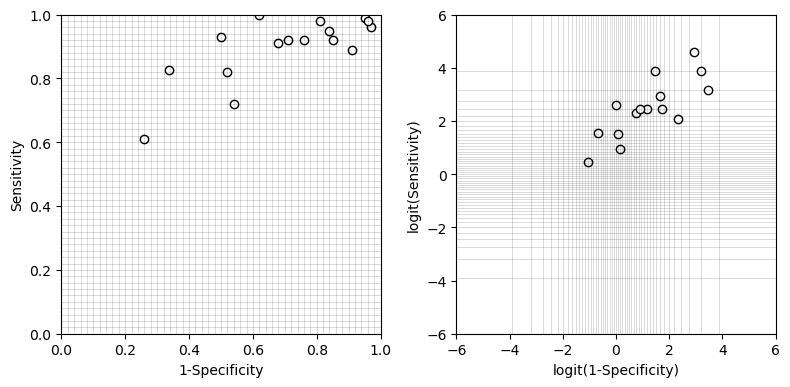

In [4]:
plt.figure(figsize=(8, 16))
plt.subplot(1,2,1)
plt.axis("square")
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
for x in np.linspace(0,1,51):
    plt.axvline(x, lw=.5, c='k', alpha=.2)
    plt.axhline(x, lw=.5, c='k', alpha=.2)
plt.scatter(1-df.specificity, df.sensitivity, edgecolors='k', c='w')
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.subplot(1,2,2)
plt.axis("square")
plt.xlabel('logit(1-Specificity)')
plt.ylabel('logit(Sensitivity)')
for x in np.linspace(1e-7, 1 - 1e-7, 51):
    plt.axvline(np.log(x / (1-x)), lw=.5, c='k', alpha=.2)
    plt.axhline(np.log(x / (1-x)), lw=.5, c='k', alpha=.2)
plt.scatter(np.log((1-df.specificity) / df.specificity),
            np.log(df.sensitivity / (1-df.sensitivity)), edgecolors='k', c='w')
plt.xlim(-6, 6)
plt.ylim(-6, 6)

plt.tight_layout()
plt.show()

In [64]:
from ipywidgets import interact
import ipywidgets as widgets

l = np.linspace(-6, 6, 101)

def show(a, b):
    plt.figure(figsize=(8, 16))
    plt.subplot(1,2,1)
    plt.axis("square")
    plt.xlabel('logit(1-Specificity)')
    plt.ylabel('logit(Sensitivity)')
    for x in np.linspace(1e-7, 1 - 1e-7, 51):
        plt.axvline(np.log(x / (1-x)), lw=.5, c='k', alpha=.2)
        plt.axhline(np.log(x / (1-x)), lw=.5, c='k', alpha=.2)
    plt.plot(l, a*l + b)
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)

    plt.subplot(1,2,2)
    plt.axis("square")
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    for x in np.linspace(0,1,51):
        plt.axvline(x, lw=.5, c='k', alpha=.2)
        plt.axhline(x, lw=.5, c='k', alpha=.2)
    plt.plot(1/(np.exp(-l)+1), 1/(np.exp(-(a*l+b))+1))
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.tight_layout()
    plt.show()

interact(show,
         a = widgets.FloatSlider(min=1/4, max=4, step=.01, value=1.0),
         b = widgets.FloatSlider(min=-4, max=4, step=.01, value=2.0))

interactive(children=(FloatSlider(value=1.0, description='a', max=4.0, min=0.25, step=0.01), FloatSlider(value…

<function __main__.show(a, b)>

In [140]:
from ipywidgets import interact
import ipywidgets as widgets

_theta = np.linspace(0, np.pi*2, 101)
_x = np.linspace(-8, 8, 101)
X = np.stack([np.cos(_theta), np.sin(_theta)])

def g(x): # logit
    return np.log(x / (1-x))

def g_inverse(x): # sigmoid
    return 1 / (np.exp(-x)+1)

logit = g
sigmoid = g_inverse

def show(mu_1, mu_2, lambda_1, lambda_2, theta):
    mu = np.array([[mu_1],[mu_2]])
    U = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])

    L = np.diag([lambda_1, lambda_2])

    plt.figure(figsize=(8, 16))
    plt.subplot(1,2,1)
    plt.axis("square")
    plt.xlabel('logit(1-Specificity)')
    plt.ylabel('logit(Sensitivity)')
    for x in np.linspace(1e-7, 1 - 1e-7, 51):
        plt.axvline(g(x), lw=.5, c='k', alpha=.15)
        plt.axhline(g(x), lw=.5, c='k', alpha=.15)
    # mu
    plt.scatter(*mu, marker='D', c='r', edgecolors='w', zorder=10)
    # ci
    plt.plot(*U@L@X+mu, lw=1, ls='--', c='k')
    # sroc
    plt.plot(_x, np.tan(theta)*(_x - mu_1) + mu_2, lw=1, c='k')
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)

    plt.subplot(1,2,2)
    plt.axis("square")
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    for x in np.linspace(0,1,51):
        plt.axvline(x, lw=.5, c='k', alpha=.15)
        plt.axhline(x, lw=.5, c='k', alpha=.15)
    # mu
    plt.scatter(*g_inverse(mu), marker='D', c='r', edgecolors='w', zorder=10)
    # ci
    plt.plot(*g_inverse(U@L@X+mu), lw=1, ls='--', c='k')
    # sroc
    plt.plot(g_inverse(_x), g_inverse(np.tan(theta)*(_x - mu_1) + mu_2), lw=1, c='k')
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.tight_layout()
    plt.show()

interact(show,
         mu_1 = widgets.FloatSlider(min=-4, max=4, step=.01, value=0),
         mu_2 = widgets.FloatSlider(min=-4, max=4, step=.01, value=2),
         lambda_1 = widgets.FloatSlider(min=0, max=4, step=.01, value=1.0),
         lambda_2 = widgets.FloatSlider(min=0, max=4, step=.01, value=0.6),
         theta = widgets.FloatSlider(min=0, max=np.pi/2 - .01, step=.01, value=np.pi/4))

interactive(children=(FloatSlider(value=0.0, description='mu_1', max=4.0, min=-4.0, step=0.01), FloatSlider(va…

<function __main__.show(mu_1, mu_2, lambda_1, lambda_2, theta)>